# 03-2 선형 회귀

k-최근접 이웃의 한계

In [1]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [2]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [3]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [4]:
knr.predict([[50]])

array([1033.33333333])

In [5]:
knr.predict([[100]])

array([1033.33333333])

Text(0, 0.5, 'weight')

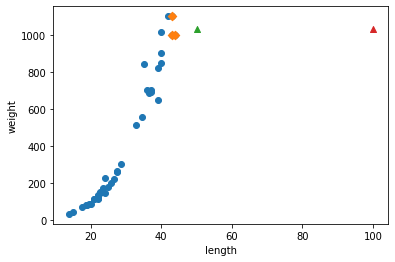

In [8]:
import matplotlib.pyplot as plt

distances, indexes = knr.kneighbors([[50]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D') # 이웃 샘플

plt.scatter(50, 1033, marker='^')
plt.scatter(100, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')

In [7]:
np.mean(train_target[indexes])

1033.3333333333333

> 최근접 이웃은 가장 가까이 있는 샘플의 평균값으로 예측하기 때문에 훈련 세트 범위 밖의 예측은 **모두 같은 값으로 예측함**

선형 회귀(linear regression)

모델 훈련

In [10]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_target)
lr.predict([[50]])

array([1241.83860323])

In [11]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


lr.coef_ : 기울기

lr.intercept_ : y절편

모델 파라미터 : 선형 회귀가 찾은 가중치처럼 머신러닝 모델이 특성에서 학습한 파라미터

> 선형회귀가 학습한 직선 : **y = lf_coef_ * x + lr.intercept_** (x는 농어 길이, y는 농어 무게)


학습한 직선 그리기

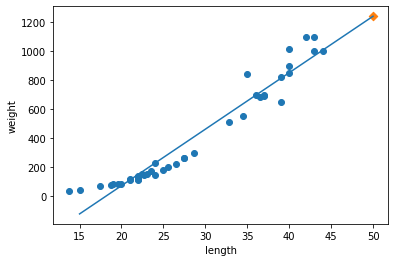

In [12]:
# 훈련 세트의 산점도
plt.scatter(train_input, train_target)

# 15부터 50까지 1차 방정식 그래프
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker='D')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [13]:
lr.score(train_input, train_target)

0.939846333997604

In [14]:
lr.score(test_input, test_target)

0.8247503123313558

> 문제점 1 : 훈련 세트에 **과대적합** 된 모델

> 문제점 2 : 훈련 세트와 테스트 세트의 점수 모두 낮음 => **과소적합** 된 모델

> 문제점 3 : 무게가 **0g 이하**인 예측이 존재할 수 있음

다항 회귀(polynomial regression)

y = a * x^2 + b * x + c (x는 길이, y는 무게)인 다항식을 만들기위한 데이터 전처리

In [15]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [16]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


모델 재훈련

In [17]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
lr.predict([[50**2, 50]])

array([1573.98423528])

In [18]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278276


> 선형 회귀가 학습한 직선 : y = 1.01 * x^2 - 21.6 * x + 116.05 (x는 길이, y는 무게)

학습한 직선 그리기

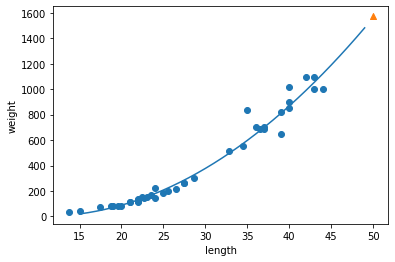

In [19]:
# 구간별 직선을 그리기 위해 15부터 49까지 정수 배열 생성
point = np.arange(15, 50)

# 훈련 세트의 산점도
plt.scatter(train_input, train_target)

# 15부터 49까지 2차 방정식 그래프
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

# 50cm 농어 데이터
plt.scatter([50], [1574], marker='^')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [20]:
lr.score(train_poly, train_target)

0.9706807451768623

In [21]:
lr.score(test_poly, test_target)

0.9775935108325121

> 성능은 좋아졌으나 여전히 테스트 세트의 점수가 더 높음(과소적합) => 조금 더 복잡한 모델 필요